In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

   subject_id action      sensor_time         x          y            z
0        1600      A  252207666810782 -0.364761   8.793503   1.0550842;
1        1600      A  252207717164786 -0.879730   9.768784   1.0169983;
2        1600      A  252207767518790  2.001495  11.109070    2.619156;
3        1600      A  252207817872794  0.450623  12.651642  0.18455505;
4        1600      A  252207868226798 -2.164352  13.928436  -4.4224854;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64311 entries, 0 to 64310
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject_id   64311 non-null  int64  
 1   action       64311 non-null  object 
 2   sensor_time  64311 non-null  int64  
 3   x            64311 non-null  float64
 4   y            64311 non-null  float64
 5   z            64311 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.9+ MB
None
       subject_id   sensor_time             x            

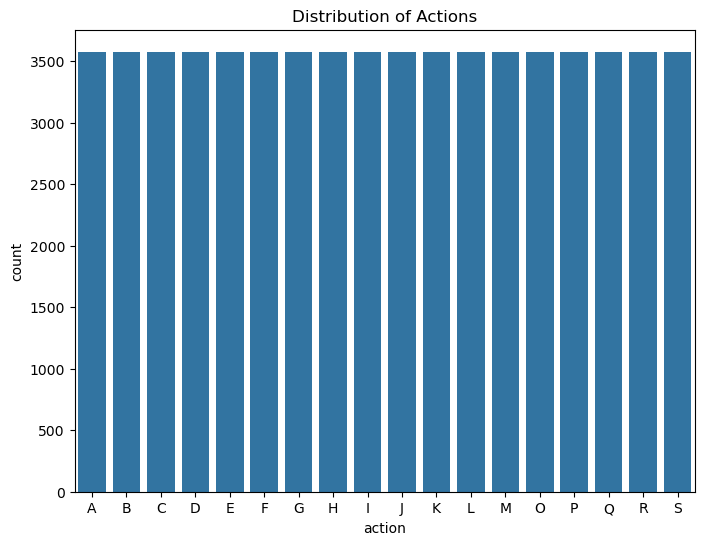

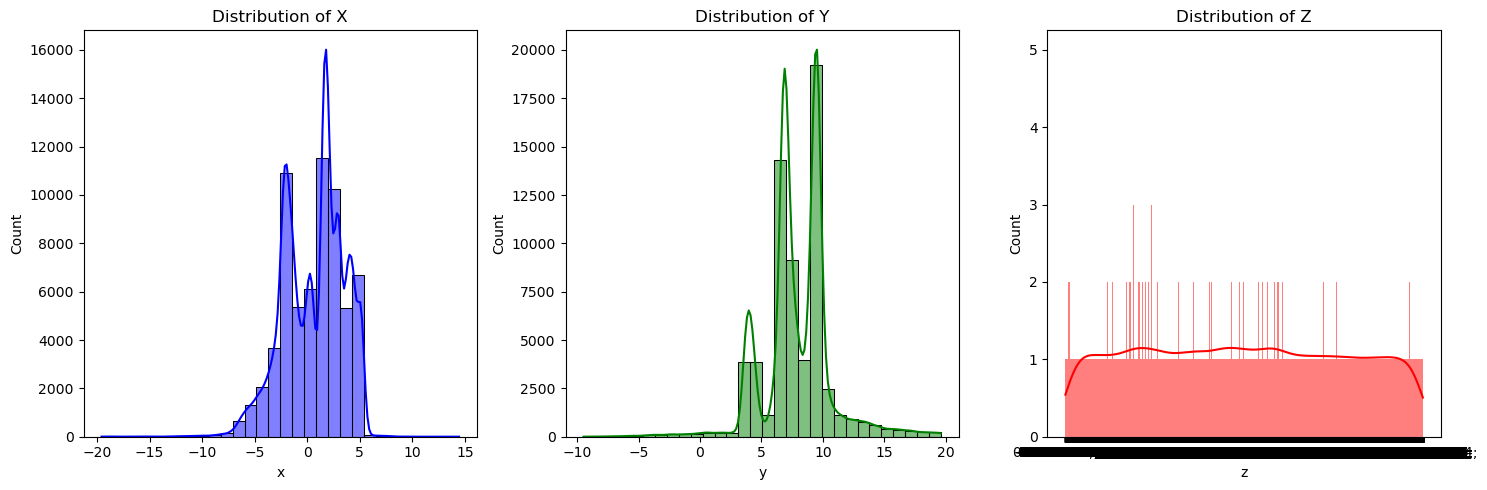

ValueError: could not convert string to float: '1.0550842;'

<Figure size 800x600 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
# Assuming the data in demo.txt is space or comma-separated
file_path = './raw/phone/accel/data_1600_accel_phone.txt'
data = pd.read_csv(file_path, header=None, names=['subject_id', 'action', 'sensor_time', 'x', 'y', 'z'], sep=',')

# Step 2: Quick glance at the data
print(data.head())
print(data.info())
print(data.describe())

# Step 3: Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Step 4: Distribution of actions
plt.figure(figsize=(8, 6))
sns.countplot(x='action', data=data)
plt.title('Distribution of Actions')
plt.show()

# Step 5: Distribution of sensor values (x, y, z)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['x'], bins=30, kde=True, color='blue')
plt.title('Distribution of X')

plt.subplot(1, 3, 2)
sns.histplot(data['y'], bins=30, kde=True, color='green')
plt.title('Distribution of Y')

plt.subplot(1, 3, 3)
sns.histplot(data['z'], bins=30, kde=True, color='red')
plt.title('Distribution of Z')

plt.tight_layout()
plt.show()

# Step 6: Correlation between sensor values
plt.figure(figsize=(8, 6))
sns.heatmap(data[['x', 'y', 'z']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sensor Values')
plt.show()

# Step 7: Line plot of sensor values over time for a sample subject
sample_subject = data[data['subject_id'] == data['subject_id'].unique()[0]]

plt.figure(figsize=(15, 6))
plt.plot(sample_subject['sensor_time'], sample_subject['x'], label='X', color='blue')
plt.plot(sample_subject['sensor_time'], sample_subject['y'], label='Y', color='green')
plt.plot(sample_subject['sensor_time'], sample_subject['z'], label='Z', color='red')
plt.title(f'Sensor Data Over Time for Subject {sample_subject["subject_id"].unique()[0]}')
plt.xlabel('Sensor Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()